### PRELIMINARIES 
### ... run each of these in a separate terminal

#### TERMINAL 1:
export SERVER='carta-cav'

ssh -L 8081:localhost:8081 "$SERVER"

#### TERMINAL 2:
export SERVER='carta-cav'

ssh -L 26025:localhost:26025 "$SERVER"

### *some addition setup to run VRP solver module may be required

### IMPORTS

In [3]:
%load_ext autoreload
%autoreload 2
from multimodal_class import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
localhost 26025
CARTA_DB_NAME = carta-cav-dev


DEBUG:paratransit:called


### INITIAL PARAMETERS

In [9]:
params = {'csv_file_path': 'INPUTS/PRE_micro2.csv'
          'modes':['drive','walk','gtfs','ondemand'],
          'time_window': [21600,36000]# in seconds. 6 AM to 10 AM
          'bnds':[np.array([-85.3394,  34.9458]), # bottom left
                  np.array([-85.2494,  35.0658])], # top right
          'groups_regions_geojson': 'INPUTS/regions4.geojson', # saved geojson file from geojson.io
          'gtfs_feed_file': 'INPUTS/carta_gtfs.zip',  # Get for city
          'gtfs_precomputed_file': 'INPUTS/gtfs_trips.obj', # generated from gtfs  ONLY RUN ONCE
          'background_congestion_file': 'INPUTS/background_traffic1.obj'  # optional - in documentation
         }

# SETUP SIMULATION

In [27]:
# OPTION-1: FULL ONE-SHOT SETUP 
# BLAH = WORLD(params,full_setup = True)

# OPTION-2: STEP-BY-STEP SETUP
WORLD1 = WORLD(params)
WORLD1.initGRAPHSnFEEDS();
WORLD1.initNETWORKS();
WORLD1.initCONVERTER();
WORLD1.initSTATS(version='agrima_code'); ###### version = 'dan_code'
WORLD1.initONDEMAND(); 
WORLD1.initPEOPLE();
WORLD1.initBACKGROUND();




loading graph/feed for drive mode...
loading graph/feed for walk mode...


INFO:root:Reading "stops.txt".
INFO:root:Reading "stop_times.txt".
INFO:root:get trips in stop_times
INFO:root:accessing trips
INFO:root:Reading "routes.txt".
INFO:root:Reading "trips.txt".
INFO:root:Reading "calendar.txt".
INFO:root:Reading "calendar_dates.txt".
INFO:root:The busiest date/s of this feed or your selected date range is/are:  ['2020-12-25', '2021-01-01', '2020-11-26', '2020-09-07'] with 1230 trips.
INFO:root:In that more than one busiest date was found, the first one will be considered.
INFO:root:In this case is 2020-12-25.
INFO:root:Reading "stop_times.txt".
INFO:root:_trips is defined in stop_times


loading graph/feed for gtfs mode...


INFO:root:computing patterns
INFO:root:Reading "shapes.txt".
INFO:root:segments_df: 2113, geometry: 2113


connecting close bus stops...
Original num of edges:  2113
Final num of edges:  3849
loading graph/feed for ondemand mode...
cutting graphs to boundaries...
composing graphs...
computing reverse graphs...
...reversing drive graph...
...reversing walk graph...
...reversing gtfs graph...
...reversing ondemand graph...
...reversing all graph...
constructing NETWORK  drive mode...
constructing NETWORK  walk mode...
constructing NETWORK  gtfs mode...
constructing NETWORK  ondemand mode...
LOADING POPULATION DATA:
Using the default year of 2021
Using FIPS code '47' for input 'TN'
Using FIPS code '065' for input 'Hamilton'
time to setup origins & dests:  1.2998511791229248
Done setting up on-demand service
ADDING NODES BY TYPE...
starting gtfs...
0
100
200
300
400
500
600
700
800
starting transit nodes...
0
100
200
300
400
500
time to create nodes...:  52.56461811065674
starting delivery1 sources...
0
starting delivery2 sources...
0
starting source nodes...
0
200
400
600
800
1000
starting tar

### FIT CONGESTION DEMAND MODELS (NOT NECESSARY - CAN BE RUN WITH DEFAULTS)

In [28]:
from multimodal_class import *
WORLD1.fitModels(counts ={'num_counts':3,'num_per_count':1}); 


updating individual choices...
person0 ...
person200 ...
person400 ...
person600 ...
DEMAND CURVE - generate (takes 10 MIN...)
...runs VRP solver (num_pts*num_per_count) times...
### ~ approx. 1 run/15 seconds...
starting on-demand curve computations for a total of 462 trips...
starting on-demand curve computation for group NUMBER  0
...for a total number of trips of 113
counts to compute:  [1, 112]
...computing averages for 1 active ondemand trips in group 0 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  152.5
...computing averages for 112 active ondemand trips in group 0 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1770.611111111111
starting on-demand curve computation for group NUMBER  1
...for a total number of trips of 126
counts to compute:  [1, 125]
...computing averages for 1 active ondemand trips in group 1 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  152.0
...computing averages for 125 active ondemand trips in group 1 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1692.8064516129032
starting on-demand curve computation for group NUMBER  2
...for a total number of trips of 11
counts to compute:  [1, 10]
...computing averages for 1 active ondemand trips in group 2 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  153.0
...computing averages for 10 active ondemand trips in group 2 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  915.0
starting on-demand curve computation for group NUMBER  3
...for a total number of trips of 212
counts to compute:  [1, 211]
...computing averages for 1 active ondemand trips in group 3 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  151.5
...computing averages for 211 active ondemand trips in group 3 ...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1147.837837837838


### PRELIMINARY PLOTS (OPTIONAL)

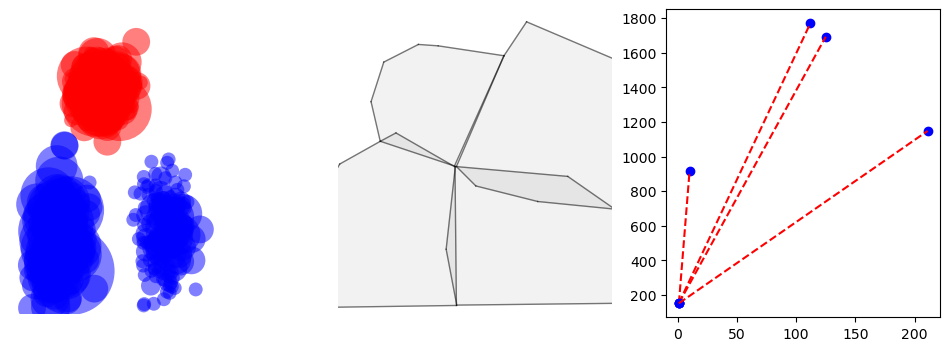

In [29]:
from multimodal_class import *
WORLD1.plotPRELIMINARIES(include_demand_curves=True);

# RUN SIMULATION

In [30]:
from multimodal_class import *
WORLD1.SIM(num_iters = 3, restart = True)

computing uncongested trip costs for mode drive ...
computing uncongested trip costs for mode walk ...
...segment number 0
...segment number 50
...segment number 100
...segment number 150
...segment number 200
...segment number 250
...segment number 300
...segment number 350
...segment number 400
...segment number 450
...segment number 500
computing uncongested trip costs for mode gtfs ...
...segment number 0
...segment number 50
...segment number 100
...segment number 150
...segment number 200
...segment number 250
...segment number 300
...segment number 350
...segment number 400
...segment number 450
...segment number 500
...segment number 550
...segment number 600
computing uncongested trip costs for mode ondemand ...
...segment number 0
...segment number 50
...segment number 100
...segment number 150
...segment number 200
...segment number 250
...segment number 300
...segment number 350
...segment number 400
...segment number 450
------------ Planning initial trips... ------------


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1902.642857142857
...expected num of trips given cost: 24.999999999999996
...actual num trips: 113
...adjusting cost estimate by 880.0
...changing cost est from 502.3618618618617 to 1382.3618618618616
...with 126 active ondemand trips...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1238.6521739130435
...expected num of trips given cost: 25.0
...actual num trips: 126
...adjusting cost estimate by 1010.0
...changing cost est from 450.2206035379804 to 1460.2206035379804
...with 11 active ondemand trips...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1712.375
...expected num of trips given cost: 25.0
...actual num trips: 11
...adjusting cost estimate by -140.0
...changing cost est from 2185.0 to 2045.0
...with 212 active ondemand trips...


DEBUG:paratransit:called
DEBUG:paratransit:called
DEBUG:paratransit:VRP: Running VRP to return a Timetable
DEBUG:paratransit:VRP: Time Limit is 300
DEBUG:paratransit:VRP: time limit will be 300
DEBUG:paratransit:VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
DEBUG:paratransit:VRP: Created Routing Index Manager
DEBUG:paratransit:VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
DEBUG:paratransit:VRP: Created Routing Model
DEBUG:paratransit:VRP: Adding Distance Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Distance Dimension
DEBUG:paratransit:VRP: Adding Time Dimension (routing.AddDimension) - Start
DEBUG:paratransit:VRP: Added Time Dimension
DEBUG:paratransit:VRP: SetArcCostEvalatorOfAllVehicles
DEBUG:paratransit:VRP: Defined Transit Callback
DEBUG:paratransit:VRP: Adding Pickup/Delivery indexes for each request - Start
DEBUG:paratransit:VRP: Finished with Pickup & Deliveries
DEBUG:paratransit:VRP: Adding Time Windows - Start
D

...average manifest trip time:  1839.9268292682927
...expected num of trips given cost: 25.0
...actual num trips: 212
...adjusting cost estimate by 1870.0
...changing cost est from 265.36718146718147 to 2135.3671814671816
starting walking computations...
...with  509  active trips...
>>> segment 0 ...
>>> segment 500 ...
updating individual choices...
person0 ...
person200 ...
person400 ...
person600 ...
iteration time:  177.2506549358368
------------------ITERATION 1 -----------
starting gtfs computations...
...with  72  active trips...
starting driving computations...
...with  0  active trips...
starting on-demand computations...
...with 0 active ondemand trips...
...average manifest trip time:  0.0
...expected num of trips given cost: 85.3666826890064
...actual num trips: 0
...adjusting cost estimate by -426.83341344503197
...changing cost est from 1382.3618618618616 to 955.5284484168296
...with 0 active ondemand trips...
...average manifest trip time:  0.0
...expected num of trips 

### GENERATE OUTPUTS

In [50]:
from multimodal_class import *
WORLD1.generateOutputs();

### SAVE OUTPUTS

In [65]:
WORLD1.saveOutputs('OUTPUTS/run3')

####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT 